# Prosper Loan Exploration
## By Maryam Ibrahim

## Introduction

The Dataset contains 113,917 loans, each loan has information on each borrower's annual percentage rate (APR), status, borrowed amount, debt, etc. Variables with missing values were dropped to make the Dataset more accurate. Outliers were also removed to provide more reliable Data. This investigation will be analyzing factors that could influence borrower's APR and what loans were taken by what type of borrowers.

### Table of Content
- [Preliminary Wrangling](#Wrangling)
- [Univariate Exploration](#UnivariateExploration)
- [Bivariate Exploration](#Bivariate)
- [Multivariate Exploration](#Multivariate)

<a id='Wrangling'></a>
## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

> - [This data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1602316069252000&usg=AOvVaw30T5Cb1SJcH_-mM-PE6sWH) explains the variables in the data set.

In [264]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
base_color = sns.color_palette()[0]

%matplotlib inline

In [265]:
# load the raw dataset
df = pd.read_csv('prosper.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Data Assessing

In [266]:
# check the shape
df.shape

(113937, 81)

In [267]:
#  check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [268]:
# check for duplicated
sum(df.duplicated())

0

In [269]:
# Display the IncomeRange Value Counts
df["IncomeRange"].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [270]:
df["ProsperRating (Alpha)"].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [271]:
df["Term"].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

### What is the structure of your dataset?

> There are total of 113937 loans entries saved in the dataset and 81 attributes. Each loan contain information on the borrowered's background information and other details like BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others. 

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is borrower's Annual Percentage Rate (APR)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that loan amount, loan term, monthly income,loan term, Prosper rating and employment status rating may have a big factor in borrower's APR.

|Variable|Description|
|---|---|
|BorrowerAPR|	The Borrower's Annual Percentage Rate (APR) for the loan|
|StatedMonthlyIncome|	The monthly income the borrower stated at the time the listing was created.|
|EmploymentStatus|	The employment status of the borrower at the time they posted the listing|
|LoanOriginalAmount|	The origination amount of the loan|
|Term|	The length of the loan expressed in months|
|ProsperRating (Alpha)|	The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.|
|IncomeRange|	The income range of the borrower at the time the listing was created|
|EmploymentStatusDuration|	The length in months of the employment status at the time the listing was created

#### Observations

- Make a subset of the dataframe by selecting columns of interest.
- Drop rows with missing APR values.
- Rename the ProsperRating (Alpha)
- Convert ProsperRating, EmploymentStatus, Term and IncomeRange to ordinal categorical 

### Data Cleaning 

Make a copy and a subset of the dataframe to work with

In [272]:
# Copy of the data frame to clean it
df_clean = df.copy()

# Subset the dataframe by selecting columns of interest
cols = ['BorrowerAPR', 'StatedMonthlyIncome', 'EmploymentStatus', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)', 'IncomeRange', 'EmploymentStatusDuration']
df_clean = df[cols]

# check first few rows
df_clean.head()

,BorrowerAPR,StatedMonthlyIncome,EmploymentStatus,LoanOriginalAmount,Term,ProsperRating (Alpha),IncomeRange,EmploymentStatusDuration
0,0.16516,3083.333333,Self-employed,9425,36,NaN,"$25,000-49,999",2.0
1,0.12016,6125.000000,Employed,10000,36,A,"$50,000-74,999",44.0
2,0.28269,2083.333333,Not available,3001,36,NaN,Not displayed,NaN
3,0.12528,2875.000000,Employed,10000,36,A,"$25,000-49,999",113.0
4,0.24614,9583.333333,Employed,15000,36,D,"$100,000+",44.0


Drop rows with missing APR values.

In [273]:
# Drop rows with no APR values
df_clean = df_clean.loc[~df_clean["BorrowerAPR"].isnull()].reset_index().drop("index", axis=1)

Rename the ProsperRating (Alpha)

In [274]:
# Rename the ProsperRating (Alpha) 
df_clean = df_clean.rename(columns={"ProsperRating (Alpha)": "ProsperRating"})

Convert ProsperRating, EmploymentStatus and IncomeRange to ordinal categorical

In [275]:
# Creat a dictionary of ordered categories
ordered_cat_dict = {'ProsperRating':['HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['Not employed', 'Not displayed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                    'EmploymentStatus':['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available'],
                    'Term': [12, 36, 60]}

# Convert to ordinal categorical 
for i in ordered_cat_dict:
    ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_cat_dict[i])
    df_clean[i] = df_clean[i].astype(ordered_cat)

In [276]:
# check the dataframe 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113912 entries, 0 to 113911
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   BorrowerAPR               113912 non-null  float64 
 1   StatedMonthlyIncome       113912 non-null  float64 
 2   EmploymentStatus          111682 non-null  category
 3   LoanOriginalAmount        113912 non-null  int64   
 4   Term                      113912 non-null  category
 5   ProsperRating             84853 non-null   category
 6   IncomeRange               113912 non-null  category
 7   EmploymentStatusDuration  106312 non-null  float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 3.9 MB


In [277]:
df_clean.describe()

,BorrowerAPR,StatedMonthlyIncome,LoanOriginalAmount,EmploymentStatusDuration
count,113912.000000,1.139120e+05,113912.000000,106312.000000
mean,0.218828,5.606973e+03,8338.015661,96.071582
std,0.080364,7.478338e+03,6245.940592,94.480605
min,0.006530,0.000000e+00,1000.000000,0.000000
25%,0.156290,3.200000e+03,4000.000000,26.000000
50%,0.209760,4.666667e+03,6500.000000,67.000000
75%,0.283810,6.817083e+03,12000.000000,137.000000
max,0.512290,1.750003e+06,35000.000000,755.000000


In [278]:
# see number of null values on each columns
df_clean.isnull().sum()

BorrowerAPR                     0
StatedMonthlyIncome             0
EmploymentStatus             2230
LoanOriginalAmount              0
Term                            0
ProsperRating               29059
IncomeRange                     0
EmploymentStatusDuration     7600
dtype: int64

In [279]:
# Save the Cleaned Dataset into csv file
df_clean.to_csv('prosper_cleaned.csv', index=False)

<a id='UnivariateExploration'></a>
## Univariate Exploration


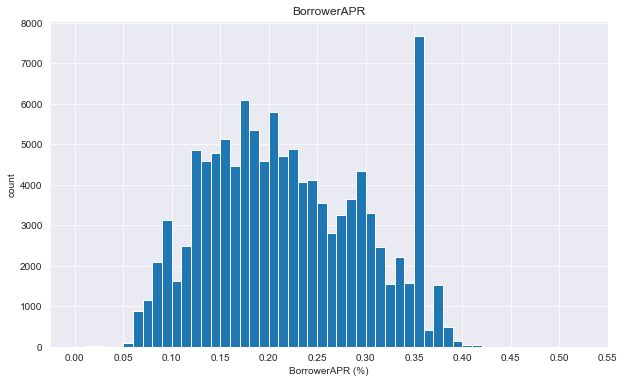

In [280]:
# Ploting the distribution of BorrowerAPR

# creat bins
bins = np.arange(0, df_clean.BorrowerAPR.max()+0.01, 0.01)

# plot and add labels
plt.figure(figsize = [10,6])
plt.hist(data = df_clean, x = 'BorrowerAPR', bins = bins);
plt.title('BorrowerAPR')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_clean['BorrowerAPR'].max()+0.05, 0.05));

In [281]:
df_clean.BorrowerAPR.mean()

0.218827655909788

> There is roughly one normal distribution,with a mean of 21.88%. The highest peak is between 0.35, and 0.36 APR

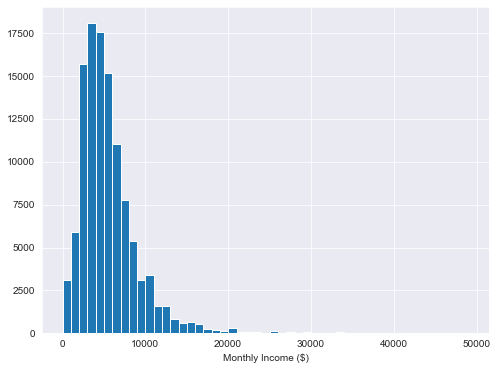

In [282]:
# Distribution of stated monthly income
bins = np.arange(0, 50000, 1000)
plt.figure(figsize = [8,6])
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins);
plt.xlabel('Monthly Income ($)');

In [283]:
# Borrowers who earn more than 100k monthly
df_clean[df_clean['StatedMonthlyIncome'] > 100000]

,BorrowerAPR,StatedMonthlyIncome,EmploymentStatus,LoanOriginalAmount,Term,ProsperRating,IncomeRange,EmploymentStatusDuration
8065,0.35643,4.166667e+05,Employed,2000,36,HR,"$100,000+",183.0
8869,0.12700,2.083333e+05,Not available,12500,36,NaN,Not displayed,NaN
17409,0.35643,4.833333e+05,Employed,7500,36,E,"$100,000+",121.0
35213,0.07389,1.083333e+05,Full-time,1000,36,AA,"$100,000+",233.0
45021,0.33973,1.500000e+05,Self-employed,4000,36,E,"$100,000+",97.0
53007,0.25785,6.185478e+05,Self-employed,4000,12,D,"$100,000+",117.0
53160,0.35797,1.750003e+06,Self-employed,4000,36,HR,"$100,000+",114.0
56860,0.11144,1.850818e+05,Self-employed,25000,36,NaN,"$100,000+",8.0
57126,0.35643,4.666667e+05,Employed,4000,36,E,"$100,000+",271.0
59291,0.24246,1.208333e+05,Self-employed,15000,36,C,"$100,000+",91.0


In [284]:
# Percentage of borrowers that whose monthly income is more than 30k a month
(df_clean['StatedMonthlyIncome']>30000).sum()/df_clean.shape[0]

0.0028706369829341947

> Monthly income looks right skewed, with most borrower's earning less than 30k a month, 
Less than 0.3 percent borrowers have stated monthly income greater than 30k, We'll consider them as outliers and we will remove borrower records with income greater than 30k.

In [285]:
# Remove data with monthly income more than 30k
df_clean = df_clean[df_clean['StatedMonthlyIncome'] <= 30000]
# check the data
(df_clean['StatedMonthlyIncome'] > 30000).sum()


0

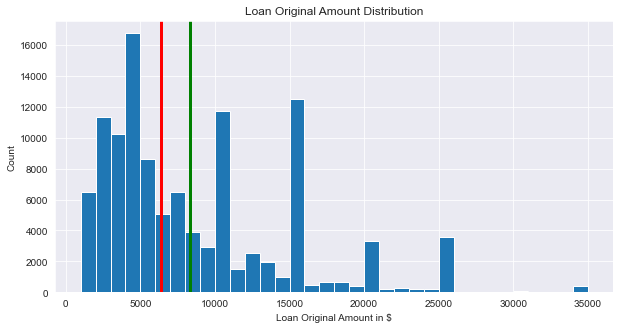

In [286]:
# Ploting Loan Original Amount Distribution

plt.figure(figsize=[10, 5])
bins = np.arange(df_clean['LoanOriginalAmount'].min(), df_clean['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins);
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.axvline(x=df_clean.LoanOriginalAmount.mean(), color='green', linewidth=3) # Show the mean with a green virtical line
plt.axvline(x=df_clean.LoanOriginalAmount.median(), color='red', linewidth=3); # Show the median with a blue virtical line

> We see that the distribution is right skewed except for few peaks, we also notice that it is quite rare for borrowers to ask for large amount of loans.

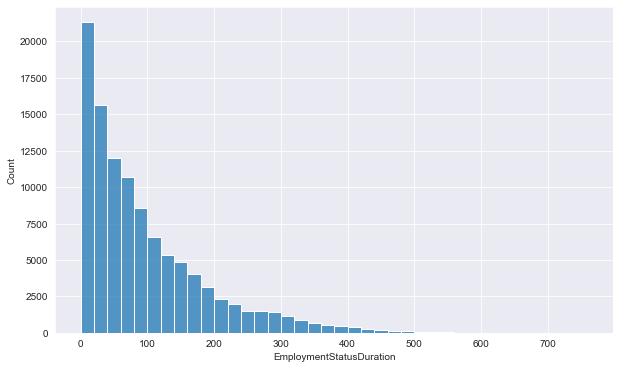

In [287]:
# Ploting the distribution of EmploymentStatusDuration
binsize = 20
bins = np.arange(0, df_clean.EmploymentStatusDuration.max()+binsize, binsize)
fig = plt.subplots(figsize=(10, 6))
sns.histplot(df_clean.EmploymentStatusDuration, bins=bins);

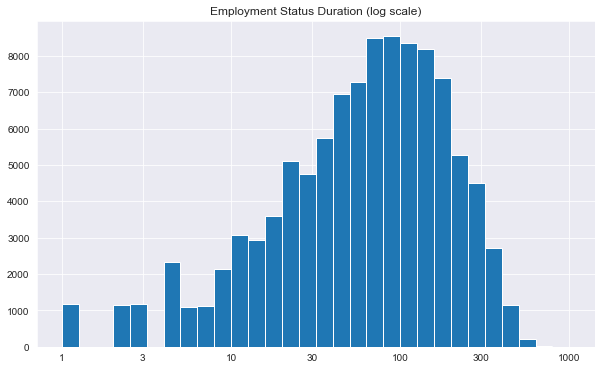

In [288]:
# Ploting the log of EmploymentStatusDuration
bins = 10 ** np.arange(0, 3.0+0.1, 0.1)
df_clean.hist('EmploymentStatusDuration', bins = bins, figsize= [10, 6]);
plt.xscale('log')
xticks = [ 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(xticks, [1, 3, 10, 30, 100, 300, 1000])

plt.title('Employment Status Duration (log scale)');

> Employment Status Duration has a long-tailed distribution with a lot of emplyees between 0 to 100 months in their current position, and when plotted the log-scale, the distribution is roughly normal with a peak around 80 to 100 months.


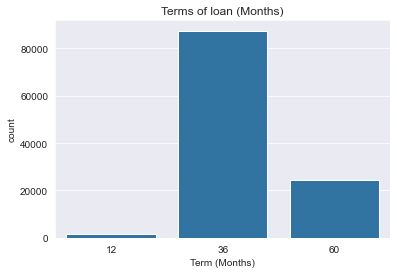

In [289]:
# Check loans term (in months)

sns.countplot(data = df_clean, x = 'Term', color = base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

> Most term of the loans are 36 months.

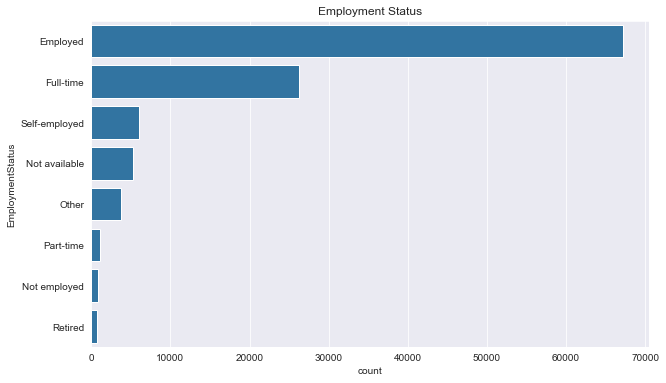

In [290]:
# plot  EmploymentStatus
plt.figure(figsize= [10, 6])
sns.countplot(data = df_clean, y = 'EmploymentStatus', color = base_color, order = df_clean['EmploymentStatus'].value_counts().index);
plt.title('Employment Status');

> Most of borrowers are employed and full-time

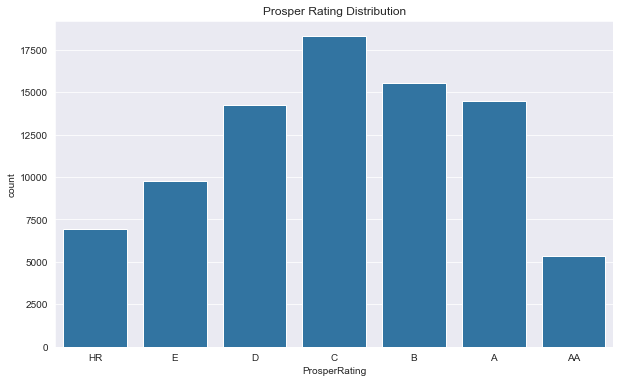

In [291]:
# Plot ProsperRating
plt.figure(figsize = [10, 6]);
sb.countplot(data = df_clean, x = 'ProsperRating',color = base_color);
plt.title('Prosper Rating Distribution');

> Most borrowers get Prosper Rating of 'C', with AA (best rating) being the least.

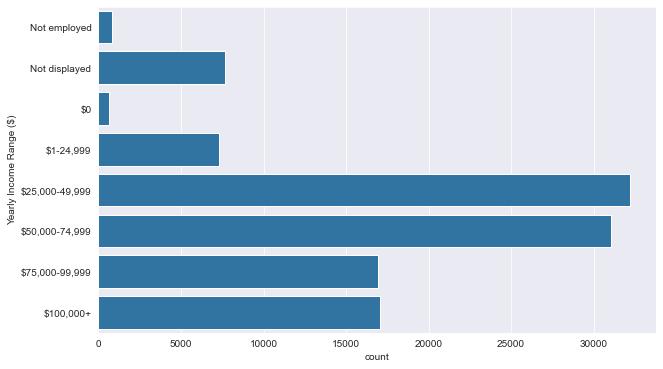

In [292]:
# Plot IncomeRange
plt.figure(figsize = [10, 6])
sns.countplot(data = df_clean, y='IncomeRange',color=base_color);
plt.ylabel('Yearly Income Range ($)');



> most of the individuals income range falls between 25,000 and 75,000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks multimodal. There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Monthly income looks right skewed, with most borrower's earning less than 30k a month, Less than 0.3 percent borrowers have stated monthly income greater than 30k, We'll consider them as outliers and we had to remove borrower records with income greater than 30k.

<a id='Bivariate'></a>
## Bivariate Exploration



In [374]:
# Listing the numeric variables
numeric_var = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'EmploymentStatusDuration']


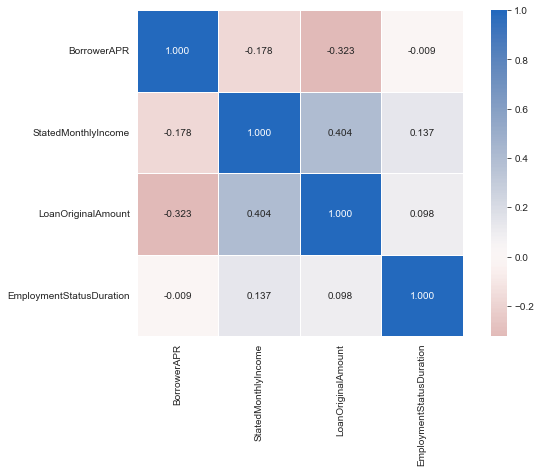

In [299]:
# correlation plot
plt.figure(figsize = [10, 6])
sns.heatmap(df_clean[numeric_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0, linewidths=.5,
           square=True);


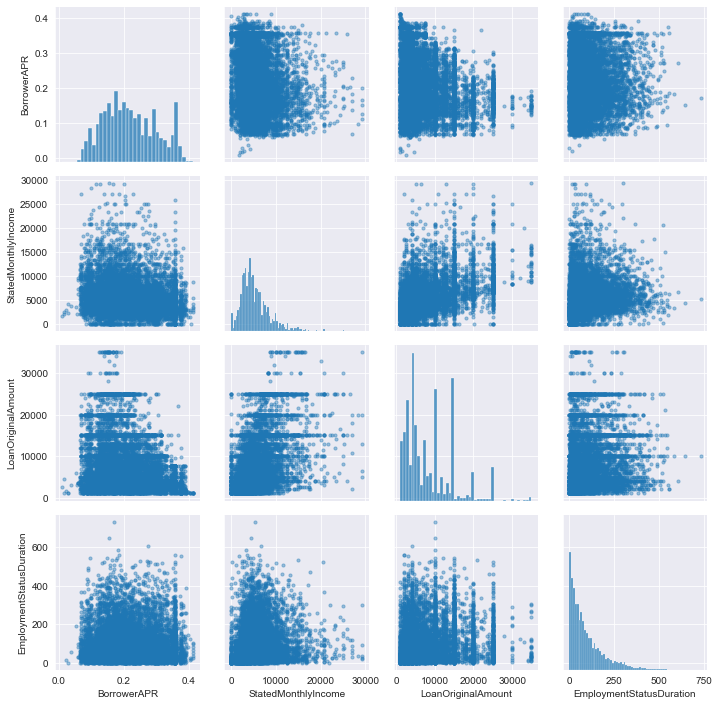

In [303]:
# Plotting a sample of 10000 for a clearer plot
sample = df_clean.sample(10000)
g = sns.PairGrid(data = sample, vars = numeric_var)
g.map_diag(sns.histplot, kde = False, color=base_color)
g.map_offdiag(plt.scatter,color = base_color, alpha = 0.4, s=10);


> There's a negative relationship between BorrowerAPR and loanOrignalAmount,expect that the bigger the loan amount the less the interest rate.

> There's a positive moderate relationship between monthly income, and loan amount.

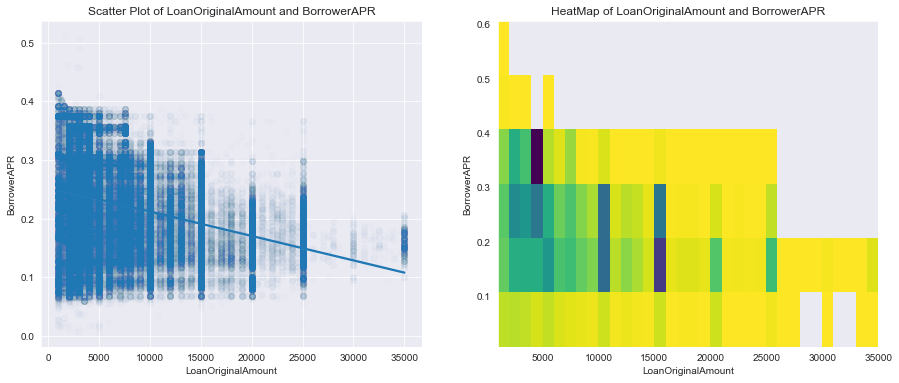

In [379]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR

# Scatter plot
plt.figure(figsize = [15, 6]) 
plt.subplot(1, 2, 1)
sns.regplot(data = df_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');


# heatmap
plt.subplot(1, 2, 2)
bins_x = np.arange(df_clean['LoanOriginalAmount'].min(), df_clean['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(df_clean['BorrowerAPR'].min(), df_clean['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = df_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');



> There's a negative relationship between LoanOriginalAmount and BorrowerAPR, which means large loans have  less annual interest rate from the borrower.

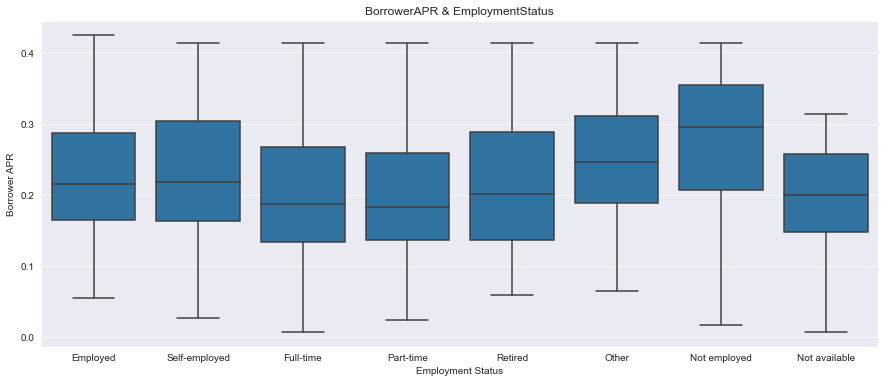

In [320]:
# Borrower APR vs Employment status
plt.figure(figsize = [15, 6])

sns.boxplot(data = df_clean,y='BorrowerAPR',x='EmploymentStatus',color = base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

> We find that there is a relation between BorrowerAPR and EmploymentStatus, as it is lower for employed individuals than not employed.

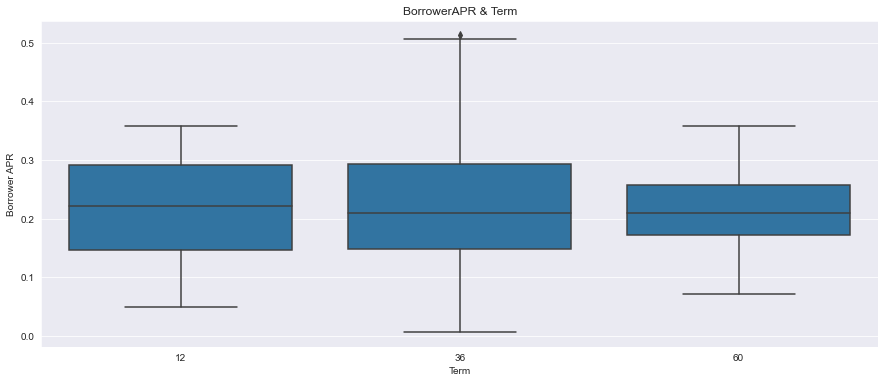

In [327]:
# Borrower APR vs Term
plt.figure(figsize = [15, 6])

sns.boxplot(data = df_clean,y ='BorrowerAPR',x ='Term',color = base_color);
plt.title('BorrowerAPR & Term');
plt.ylabel('Borrower APR');
plt.xlabel('Term');

> No clear relation between BorrowerAPR and the payment Term.

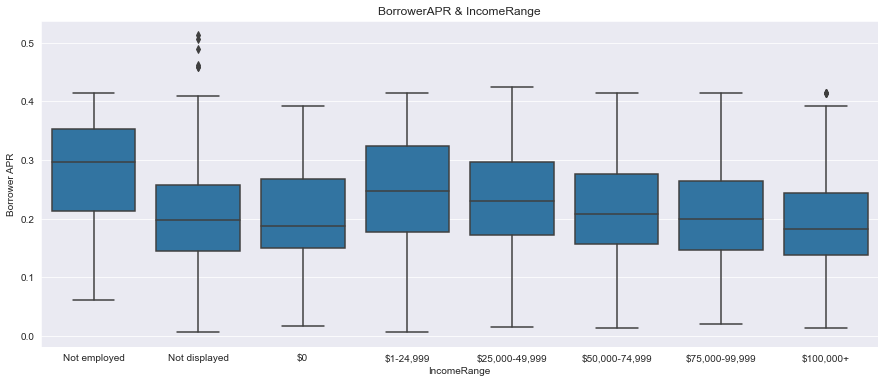

In [372]:
# Borrower APR vs Term
plt.figure(figsize = [15, 6])

sns.boxplot(data = df_clean,y ='BorrowerAPR',x ='IncomeRange',color = base_color);
plt.title('BorrowerAPR & IncomeRange');
plt.ylabel('Borrower APR');
plt.xlabel('IncomeRange');

> APR also goes down with increased income range at up to +$100,000

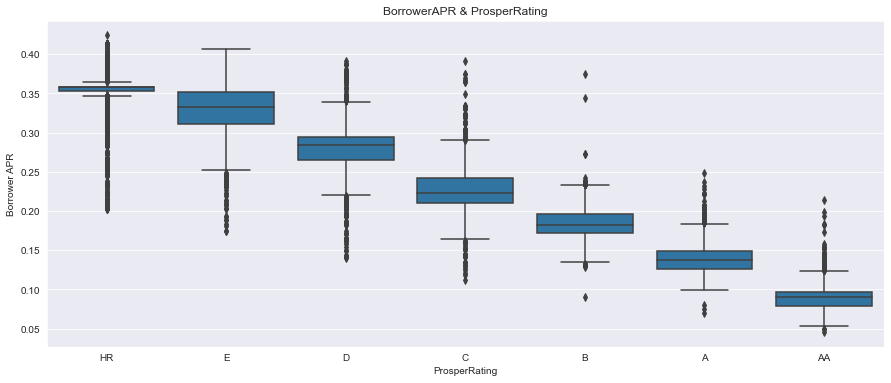

In [373]:
# Borrower APR vs Term
plt.figure(figsize = [15, 6])

sns.boxplot(data = df_clean,y ='BorrowerAPR',x ='ProsperRating',color = base_color);
plt.title('BorrowerAPR & ProsperRating');
plt.ylabel('Borrower APR');
plt.xlabel('ProsperRating');

> Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> People who are not employed receive high interest rate compared to the employed. The higher the income, the lower the interest rate. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan original amount is positively correlated with the stated monthly income

<a id='Multivariate'></a>
## Multivariate Exploration


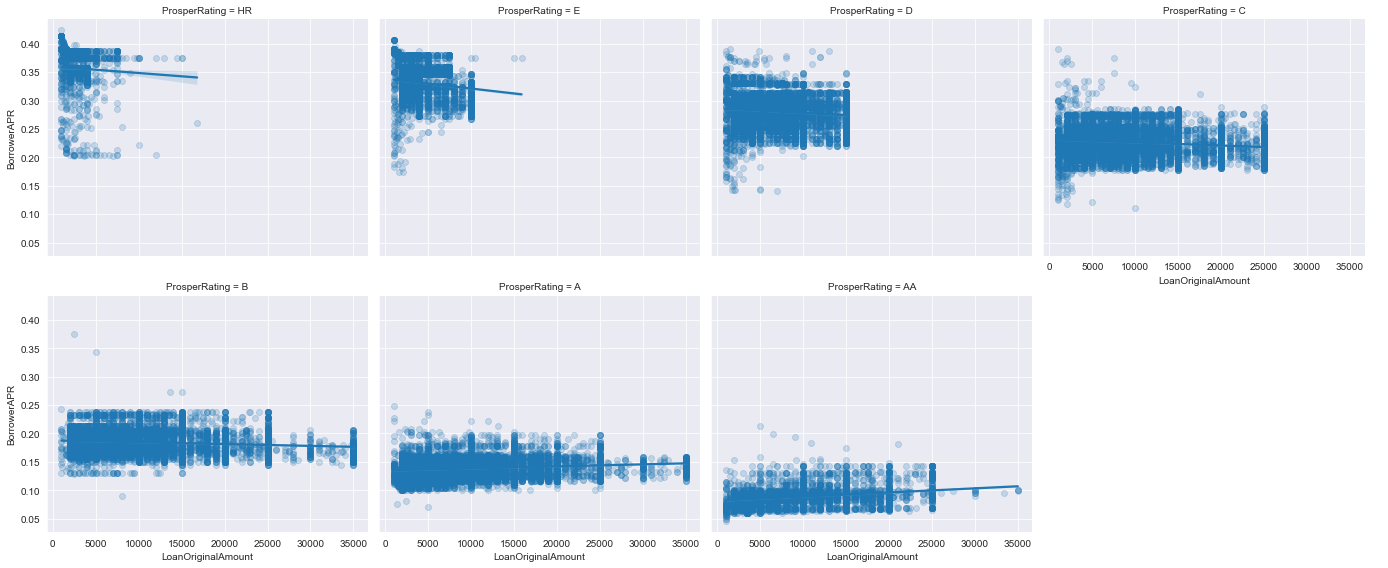

In [383]:
#ProsperRating effect on relationship between BorrowerAPR and LoanOriginalAmount
g = sns.FacetGrid(data = df_clean, col = 'ProsperRating', col_wrap = 4, aspect = 1.2, height = 4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws = {'alpha' : 0.2}, x_jitter = 0.3);
g.add_legend(); 

> The loan amount increases with better rating. The borrower APR decreases with better rating. The relationship between borrower APR and loan amount changes from negative to slightly positive when the Prosper ratings are increased from HR to A or better. 

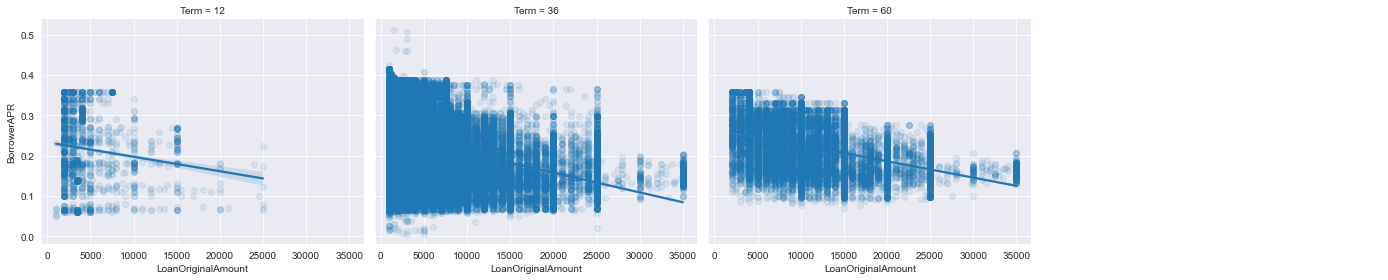

In [385]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data = df_clean, col = 'Term', aspect = 1.2, height = 4, col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha':0.1});
g.add_legend();


> Term doesn't seem to have an effect between borrowerAPR and LoanOriginalAmount.

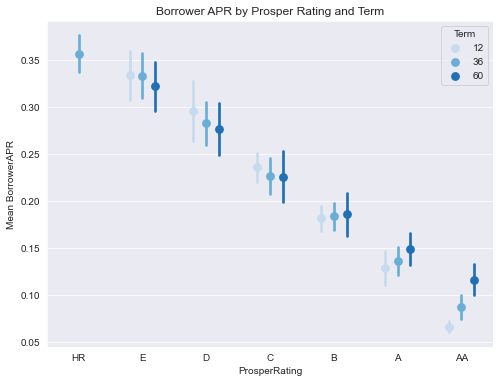

In [386]:
# Borrower APR by Prosper Rating and Term
plt.figure(figsize = [8, 6])
sns.pointplot(data = df_clean, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'Term',
              linestyles='', palette = 'Blues', dodge = 0.4, ci = 'sd')
plt.ylabel('Mean BorrowerAPR')
plt.title('Borrower APR by Prosper Rating and Term');

> The borrowerAPR decreases with the increase of borrow term for people with HR to C ratings. But for people with B-AA ratings, the APR increase with the increase of borrow term. 

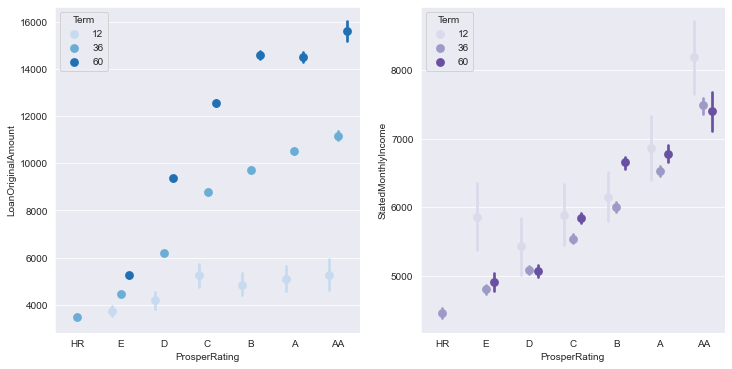

In [394]:
# Prosper Rating and Term effects on  monthly income and loan original amount 
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_clean, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[0]);
sb.pointplot(data = df_clean, x = 'ProsperRating', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[1]);


> When the Prosper rating is better, the loan amount of all three terms increases, the increase  of loan amount between terms also becomes larger.
> For stated monthly income, it doesn't seem like there is a major effect between term and rating,  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. 
> When the Prosper rating is better, the loan amount of all three terms increases, the increase of loan amount between terms also becomes large

### Were there any interesting or surprising interactions between features?

> A surprising interaction is that the borrowerAPR and loan amount are negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA.
> Another interesting thing is that with longer payment terms, on average, BorrowerAPR increases from ProsperRating B till AA.